In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_excel('phase_sheet.xlsx')
data = df.to_numpy()
X = data[:,list(range(25))]
Y = data[:,25]
Y = Y - 1
Y = Y.astype(int)
X = X.astype(int)

print(f'The shape of input X is {X.shape}')
print(f'The shape of output Y is {Y.shape}')

The shape of input X is (383, 25)
The shape of output Y is (383,)


In [3]:
X_train = X
Y_train = Y
X_temp, X_, Y_temp, Y_= train_test_split(X, Y, test_size=0.30, random_state = 23)
X_test,X_cv,Y_test,Y_cv = train_test_split(X_, Y_, test_size=0.50, random_state = 23)
print(f'The shape of training set(input) is: {X_train.shape}')
print(f'The shape of training set(output) is: {Y_train.shape}')
print(f'The shape of CV set(input) is: {X_cv.shape}')
print(f'The shape of CV set(output) is: {Y_cv.shape}')
print(f'The shape of test set(input) is: {X_test.shape}')
print(f'The shape of test set(output) is: {Y_test.shape}')

The shape of training set(input) is: (383, 25)
The shape of training set(output) is: (383,)
The shape of CV set(input) is: (58, 25)
The shape of CV set(output) is: (58,)
The shape of test set(input) is: (57, 25)
The shape of test set(output) is: (57,)


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
scaling_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}
joblib.dump(scaling_params, 'logistic/scaling_params.pkl')
X_cv_scaled = scaler.fit_transform(X_cv)
X_test_scaled = scaler.fit_transform(X_test)
print('Done')

Done


In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
poly_params = {
    'powers_': poly.powers_,
    'interaction_only': poly.interaction_only,
    'include_bias': poly.include_bias
}
joblib.dump(poly_params, 'logistic/poly_params.pkl')
X_cv_poly = poly.fit_transform(X_cv_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

In [6]:
best_model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs',random_state=42, C=1)
best_model.fit(X_train_poly, Y_train)

LogisticRegression(C=1, max_iter=10000, multi_class='multinomial',
                   random_state=42)

In [7]:
Y_train_hat = best_model.predict(X_train_poly)
train_accuracy = accuracy_score(Y_train,Y_train_hat)
print(f'Training Accuracy: {train_accuracy}')

Y_cv_hat = best_model.predict(X_cv_poly)
val_accuracy = accuracy_score(Y_cv,Y_cv_hat)
print(f'Validation Accuracy: {val_accuracy}')

Y_test_hat = best_model.predict(X_test_poly)
test_accuracy = accuracy_score(Y_test,Y_test_hat)
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 0.9112271540469974
Validation Accuracy: 0.896551724137931
Testing Accuracy: 0.8771929824561403


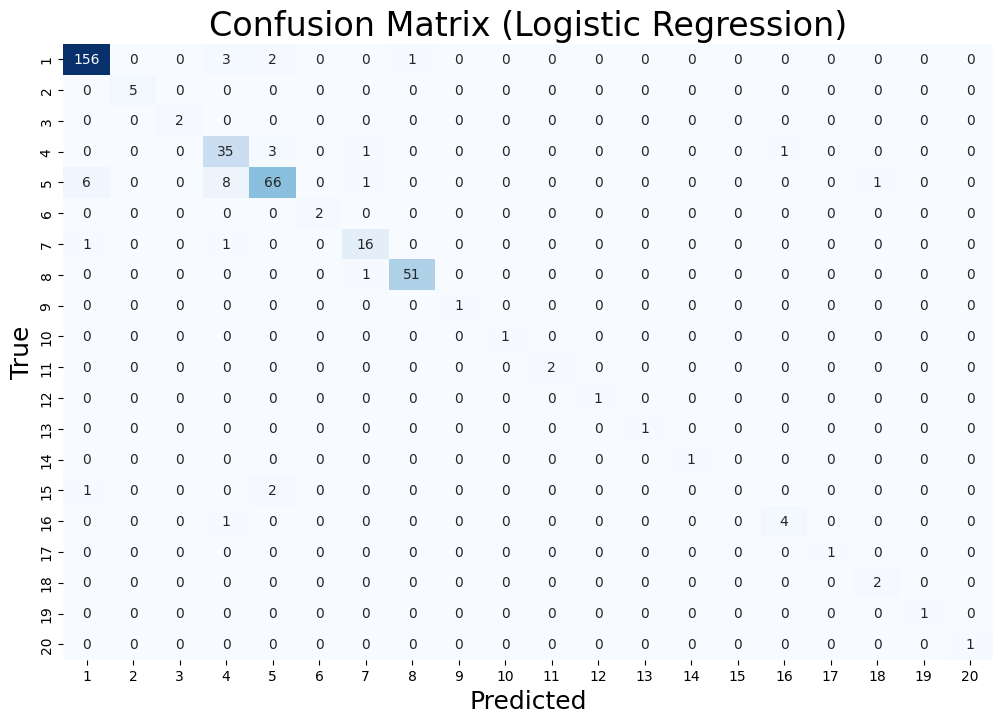

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming your predictions are stored in 'y_pred'
conf_matrix = confusion_matrix(Y_train, Y_train_hat)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Adding 1 to class labels for display purposes
class_labels = [str(i) for i in range(1, 21)]
plt.xticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)
plt.yticks(ticks=[i + 0.5 for i in range(20)], labels=class_labels)

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('True', fontsize=18)
plt.title('Confusion Matrix (Logistic Regression)', fontsize=24)
plt.savefig('logistic/cf.png')
plt.show()

In [9]:
import math

train_accuracy = math.floor(train_accuracy * 100) / 100
print(train_accuracy)

val_accuracy = math.floor(val_accuracy * 100) / 100
print(val_accuracy)

test_accuracy = math.floor(test_accuracy * 100) / 100
print(test_accuracy)

0.91
0.89
0.87


In [10]:
from openpyxl import Workbook
from openpyxl.utils import get_column_letter

wb = Workbook()
ws = wb.active

j = 1

ws[str(get_column_letter(j)) + str(1)].value = 'Train_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = train_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'Val_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = val_accuracy

j += 1

ws[str(get_column_letter(j)) + str(1)].value = 'test_accuracy'
ws[str(get_column_letter(j)) + str(2)].value = test_accuracy

j += 1

wb.save('logistic/result.xlsx')
print('Done')

Done


In [11]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'logistic/logistic.joblib')

['logistic/logistic.joblib']